#### Exploratry Data Analysis RQ5
* Does a long distance correlate with the duration of the trip on average? 

* Make a plot that show the dependence between distance and duration of the trip. 

* Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rq3_functions import calculate_trip_duration

In [2]:
# -------------------------------------------
# Reading csv file from RQ3 
# trip_duration_df = pd.read_csv("trip_duration_all_months_df.csv")

In [3]:
# ---------------------------------------
# month.head()

We will analyse the columns:
* **Trip_distance** - The elapsed trip distance in miles reported by the taximeter
* **tpep_pickup_datetime** - The date and time when the meter was engaged.
* **tpep_dropoff_datetime** - The date and time when the meter was disengaged. 

In [4]:
#We create a list with the name of the .csv files
taxi_data = ['yellow_tripdata_2018-0'+str(i)+'.csv' for i in range(1,7)]

### Preparing data for each month ----------

# Creating dataframe for prepared data (all months)
trip_duration_and_distance_df = pd.DataFrame(data={"duration":[], "trip_distance":[]})

# Setting the path to the files
path = "D:/"

# Loop for each file
for month_data in taxi_data:
    month_data_df = pd.read_csv(path + month_data)
    
    # Selecting interesting columns
    tmp_trip_duration_df = month_data_df[["tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance"]]
    
    # Calculating trip duration using before defined function
    trip_duration_df = calculate_trip_duration(tmp_trip_duration_df)[["duration", "trip_distance"]]
    
    # Concatenating prepared data to the dataframe with all months
    trip_duration_and_distance_df = pd.concat([trip_duration_and_distance_df, trip_duration_df])
    
    # Deleting unnecessary variables for better memory managing
    del trip_duration_df, tmp_trip_duration_df, month_data_df

C:\Users\Asia\Dropbox\ADM-HM2-NY_Taxi\rq3_functions.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['duration'] = (drop_off - pick_up).astype('timedelta64[m]')


In [ ]:
# Saving to csv
# trip_duration_and_distance_df.to_csv("D:/trip_duration_and_distance.csv")

In [5]:
trip_duration_and_distance_df.head()

,duration,trip_distance
0,3.0,0.5
1,18.0,2.7
2,5.0,0.8
3,32.0,10.2
4,17.0,2.5


In [11]:
trip_duration_and_distance_df.describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

,duration,trip_distance
count,5.392574e+07,5.392574e+07
mean,1.604486e+01,2.900861e+00
std,1.455252e+03,2.607412e+01
min,-1.066961e+07,0.000000e+00
50%,1.000000e+01,1.600000e+00
60%,1.300000e+01,2.000000e+00
70%,1.600000e+01,2.560000e+00
80%,2.000000e+01,3.600000e+00
90%,2.700000e+01,6.710000e+00
95%,3.600000e+01,1.073000e+01


The next step is data cleaning. As in RQ3 , duration is not possible to be less than 0.
It is also reasonable to filter out values for duration and trip_distance which are equal to 0.

* According to the analysis od percentiles we can observe that there are outliers both in duration and trip_distance data. 

For example, for the 99th percentile trip_distance is about 19 miles, and the maximum is almost 190,000. It seems reasonable to filter trips with a distance less than 500 miles.

In [13]:
filtered_trip_duration_and_distance_df = trip_duration_and_distance_df[(trip_duration_and_distance_df.duration.between(1,100)) & (trip_duration_and_distance_df.trip_distance.between(0, 100))]

In [14]:
filtered_trip_duration_and_distance_df.describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

,duration,trip_distance
count,5.333305e+07,5.333305e+07
mean,1.357759e+01,2.908568e+00
std,1.125042e+01,3.705891e+00
min,1.000000e+00,0.000000e+00
50%,1.000000e+01,1.600000e+00
60%,1.300000e+01,2.000000e+00
70%,1.600000e+01,2.580000e+00
80%,2.000000e+01,3.600000e+00
90%,2.700000e+01,6.730000e+00
95%,3.500000e+01,1.071000e+01


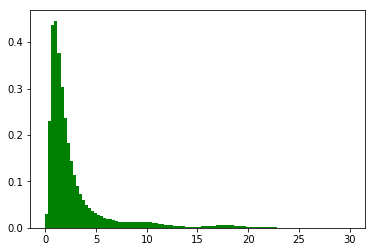

In [23]:
# Plotting the density histogram
h1 = plt.hist(filtered_trip_duration_and_distance_df.trip_distance, density=True, bins=100, range=(0, 30), color="green")

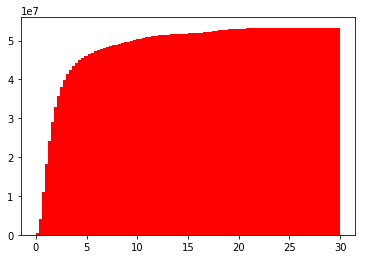

In [24]:
# Plotting Cumulative Density Function
cdf = plt.hist(filtered_trip_duration_and_distance_df.trip_distance, cumulative=True, bins=100, range=(0,30), color="red")

 Describe plots/histograms above!

### Correlation between distance and duration of the trip.

After filtering the data, we can check the correlation.

In [30]:
# Filtering duration < 30 and trip_distance < 10
filtered_trip_duration_and_distance_df2 = trip_duration_and_distance_df[(trip_duration_and_distance_df.duration.between(1,30)) & (trip_duration_and_distance_df.trip_distance.between(0, 10))]

c:\users\asia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


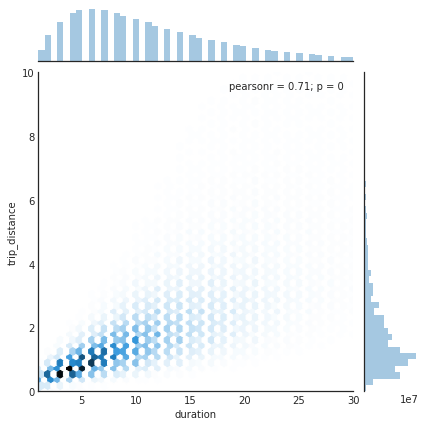

In [33]:
with sns.axes_style('white'):
    sns.jointplot("duration", "trip_distance", filtered_trip_duration_and_distance_df2, kind='hex')